<h1>Project Overview</h1>

Using what you've learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City porperty market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

1. BOROUGH : A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
2. BLOCK; LOT :The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
3. BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: : The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

1. Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
2. This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

<h1>Import Library</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

<h1>Dataset</h1>

In [2]:
# read dataset
df = pd.read_csv('/Users/agilh/Downloads/nyc-rolling-sales.csv')


# menampilkan dataset
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [3]:
# melihat informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

<h1>Preprocessing</h1>

<h2>Mengecek Missing Value</h2>

In [4]:
# mengantisipasi untuk unstandard missing value
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN',' ',' -  ']
df = pd.read_csv('/Users/agilh/Downloads/nyc-rolling-sales.csv', na_values=missing_values)

In [5]:
# melihat jumlah missing value yang ada pada setiap kolom
df.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

<h2>Drop Kolom</h2>

In [6]:
# drop kolom yang tidak dibutuhkan untuk proses analisis
df.drop(labels=['Unnamed: 0','EASE-MENT','ADDRESS','APARTMENT NUMBER', 'ZIP CODE'], axis=1, inplace=True)

<h2>Handling Missing Value</h2>

In [7]:
# drop missing value
df.dropna(inplace=True)

In [8]:
# melihat informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47892 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         47892 non-null  int64  
 1   NEIGHBORHOOD                    47892 non-null  object 
 2   BUILDING CLASS CATEGORY         47892 non-null  object 
 3   TAX CLASS AT PRESENT            47892 non-null  object 
 4   BLOCK                           47892 non-null  int64  
 5   LOT                             47892 non-null  int64  
 6   BUILDING CLASS AT PRESENT       47892 non-null  object 
 7   RESIDENTIAL UNITS               47892 non-null  int64  
 8   COMMERCIAL UNITS                47892 non-null  int64  
 9   TOTAL UNITS                     47892 non-null  int64  
 10  LAND SQUARE FEET                47892 non-null  float64
 11  GROSS SQUARE FEET               47892 non-null  float64
 12  YEAR BUILT                      

<h2>Drop Duplikasi</h2>

In [9]:
# menghitung jumlah data duplikat
sum(df.duplicated())

403

In [10]:
# drop data duplikat
df = df.drop_duplicates()

In [11]:
# menghitung jumlah data duplikat
sum(df.duplicated())

0

In [12]:
# melihat informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47489 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         47489 non-null  int64  
 1   NEIGHBORHOOD                    47489 non-null  object 
 2   BUILDING CLASS CATEGORY         47489 non-null  object 
 3   TAX CLASS AT PRESENT            47489 non-null  object 
 4   BLOCK                           47489 non-null  int64  
 5   LOT                             47489 non-null  int64  
 6   BUILDING CLASS AT PRESENT       47489 non-null  object 
 7   RESIDENTIAL UNITS               47489 non-null  int64  
 8   COMMERCIAL UNITS                47489 non-null  int64  
 9   TOTAL UNITS                     47489 non-null  int64  
 10  LAND SQUARE FEET                47489 non-null  float64
 11  GROSS SQUARE FEET               47489 non-null  float64
 12  YEAR BUILT                      

<h2>Perubahan Type Data</h2>

In [13]:
# membuat variabel untuk pengkategorian
categoricals_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
                'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
                'BUILDING CLASS AT PRESENT']
float_columns = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
integer_columns = ['BLOCK', 'LOT']

# ubah kolom yang seharusnya kategori menjadi tipe 'str'
for col in categoricals_columns:
    df[col] = df[col].astype('str')

# ubah kolom yang seharusnya float menjadi tipe 'float'
for col in float_columns:
    df[col] = df[col].astype('float64')

# ubah kolom yang seharusnya int menjadi tipe 'int'
for col in integer_columns:
    df[col] = df[col].astype('int64')

In [14]:
# melihat informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47489 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         47489 non-null  object 
 1   NEIGHBORHOOD                    47489 non-null  object 
 2   BUILDING CLASS CATEGORY         47489 non-null  object 
 3   TAX CLASS AT PRESENT            47489 non-null  object 
 4   BLOCK                           47489 non-null  int64  
 5   LOT                             47489 non-null  int64  
 6   BUILDING CLASS AT PRESENT       47489 non-null  object 
 7   RESIDENTIAL UNITS               47489 non-null  int64  
 8   COMMERCIAL UNITS                47489 non-null  int64  
 9   TOTAL UNITS                     47489 non-null  int64  
 10  LAND SQUARE FEET                47489 non-null  float64
 11  GROSS SQUARE FEET               47489 non-null  float64
 12  YEAR BUILT                      

<h2>Menghapus Outlier</h2>

In [15]:
# Hitung kuartil 1 dan kuartil 3 setiap kolom pada data
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Hitung IQR (interquartile range) setiap kolom pada data
IQR = Q3 - Q1

# Definisikan batas bawah dan batas atas setiap kolom pada data
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus data yang melebihi batas bawah atau batas atas pada setiap kolom
df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Lakukan indexing ulang pada dataframe karena indexnya berantakan setelah dilakukan penghapusan data outliers
df_filtered = df_filtered.reset_index(drop=True)

# Tampilkan informasi tentang jumlah data sebelum dan sesudah penghapusan outliers
print(f"Jumlah data awal: {len(df)}")
print(f"Jumlah data setelah penghapusan outliers: {len(df_filtered)}")

df = df_filtered

Jumlah data awal: 47489
Jumlah data setelah penghapusan outliers: 29788


In [16]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,GREENWICH VILLAGE-WEST,01 ONE FAMILY DWELLINGS,1,585,69,A5,1,0,1,384.0,1152.0,1901,1,A5,1375000.0,2016-10-07 00:00:00
1,1,HARLEM-CENTRAL,01 ONE FAMILY DWELLINGS,1,1960,41,A9,1,0,1,1665.0,3200.0,1910,1,A9,1510000.0,2017-01-03 00:00:00
2,1,HARLEM-CENTRAL,01 ONE FAMILY DWELLINGS,1,2041,126,A9,1,0,1,1699.0,3536.0,1901,1,A9,1595790.0,2017-08-31 00:00:00
3,1,HARLEM-CENTRAL,01 ONE FAMILY DWELLINGS,1,2051,62,A4,1,0,1,2000.0,3360.0,1899,1,A4,1000000.0,2016-09-29 00:00:00
4,1,HARLEM-CENTRAL,02 TWO FAMILY DWELLINGS,1,1754,116,B1,2,0,2,1231.0,3240.0,1899,1,B1,1550000.0,2017-03-30 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29783,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7267,182,B2,2,0,2,3985.0,2700.0,1996,1,B2,600000.0,2017-02-27 00:00:00
29784,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,2,0,2,3325.0,1300.0,1995,1,B2,509000.0,2016-10-31 00:00:00
29785,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
29786,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00


<h1>Measure of Tendency Central and Measure of Spread</h1>

In [17]:
# memunculkan semua hasil statistik describe
df.describe(include='all')

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,29788,29788,29788,29788,29788.000000,29788.000000,29788,29788.000000,29788.0,29788.000000,29788.000000,29788.000000,29788,29788,29788,2.978800e+04,29788
unique,5,203,16,6,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,132,4,39,NaN,357
top,3,EAST NEW YORK,01 ONE FAMILY DWELLINGS,1,NaN,NaN,A1,NaN,NaN,NaN,NaN,NaN,1920,1,A1,NaN,2016-12-22 00:00:00
freq,13006,763,11616,25887,NaN,NaN,4229,NaN,NaN,NaN,NaN,NaN,3408,26273,4225,NaN,198
mean,NaN,NaN,NaN,NaN,5439.040251,44.557674,NaN,1.454579,0.0,1.454579,2350.646334,1653.484356,NaN,NaN,NaN,4.802331e+05,NaN
std,NaN,NaN,NaN,NaN,3237.478575,35.764599,NaN,0.855638,0.0,0.855638,1230.895828,941.807843,NaN,NaN,NaN,3.934639e+05,NaN
min,NaN,NaN,NaN,NaN,15.000000,1.000000,NaN,0.000000,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,3135.000000,18.000000,NaN,1.000000,0.0,1.000000,1800.000000,1175.000000,NaN,NaN,NaN,1.500000e+05,NaN
50%,NaN,NaN,NaN,NaN,5115.500000,37.000000,NaN,1.000000,0.0,1.000000,2258.000000,1616.000000,NaN,NaN,NaN,4.550000e+05,NaN
75%,NaN,NaN,NaN,NaN,7397.000000,60.000000,NaN,2.000000,0.0,2.000000,3000.000000,2224.000000,NaN,NaN,NaN,7.000000e+05,NaN


<h2>Mean</h2>

In [18]:
# mencari mean gross square feet
print("Mean GROSS SQUARE FEET = ", df['GROSS SQUARE FEET'].mean())

Mean GROSS SQUARE FEET =  1653.484356116557


<h2>Median</h2>

In [19]:
# mencari median land square feet
print("Median LAND SQUARE FEET = ", df['LAND SQUARE FEET'].median())

Median LAND SQUARE FEET =  2258.0


<h2>Modus</h2>

In [20]:
# mencari modus building class category
cols = ['BUILDING CLASS CATEGORY']
for col in cols:
    print("Modus "+col+" = ",df[col].mode()[0])

Modus BUILDING CLASS CATEGORY =  01 ONE FAMILY DWELLINGS                    


<h2>Range</h2>

In [21]:
# mencari range sale price
print('Range SALE PRICE = ', (df['SALE PRICE'].max() - df['SALE PRICE'].min()))

Range SALE PRICE =  1925000.0


<h2>Variance</h2>

In [22]:
# mencari variance block
print('Variance dari BLOCK = ', df['BLOCK'].var())

Variance dari BLOCK =  10481267.522836756


<h2>Standard Deviation</h2>

In [23]:
# mencari standard deviation dari LOT
print('Standard Deviation dari LOT = ', df['LOT'].std())

Standard Deviation dari LOT =  35.76459869967398


<h1>Propability Distribution</h1>

Implementasi Propablity Distribution digunakan untuk melihat distribusi dari kolom 'GROSS SQUARE FEET'

<h2>Normal Distribution</h2>

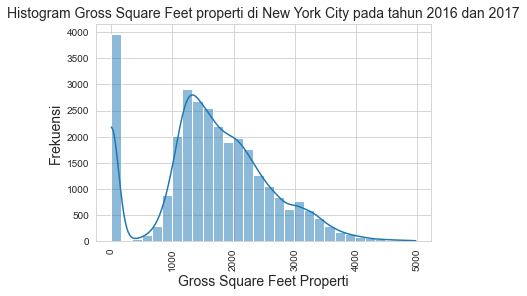

In [25]:
# menentukan style plot
sns.set_style('whitegrid')

# membuat histogram Gross Square Feet properti di New York City pada tahun 2016 dan 2017
sns.histplot(data=df, x='GROSS SQUARE FEET', bins=30, kde=True)
plt.title('Histogram Gross Square Feet properti di New York City pada tahun 2016 dan 2017', fontsize=14)
plt.xlabel('Gross Square Feet Properti', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.xticks(rotation=90)
plt.show()

Dari visualisasi histogram diatas memiliki jenis skew ke kiri, untuk mengatasi hal tersebut perlu adanya transformasi data untuk memperbaikinya

<h2>Handling Skew</h2>

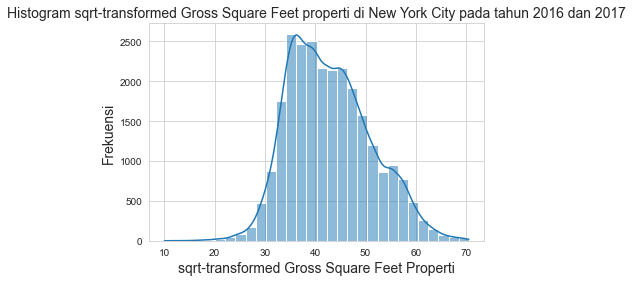

In [26]:
# Menghilangkan nilai 0 dari data
df = df[df['GROSS SQUARE FEET'] > 0]

# Melakukan sqrt-transform pada data
sqrt_data = np.sqrt(df['GROSS SQUARE FEET'])

# Membuat histogram dari sqrt-transformed data
sns.set_style('whitegrid')
sns.histplot(data=sqrt_data, bins=30, kde=True)
plt.title('Histogram sqrt-transformed Gross Square Feet properti di New York City pada tahun 2016 dan 2017', fontsize=14)
plt.xlabel('sqrt-transformed Gross Square Feet Properti', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.show()

<h2>Mengecek Nilai Skew</h2>

In [28]:
# Menghitung nilai skewed pada data sqrt-transformed
skew = sqrt_data.skew()

print("Nilai skewness pada data sqrt-transformed: {:.2f}".format(skew))

Nilai skewness pada data sqrt-transformed: 0.40


<h1>Confidence Intervals</h1>

Implementasi Confidence Intervals untuk melihat 'SALE PRICE' di New York City pada tahun 2016 dan 2017

<h2>Mengganti Nilai 0 Dengan Nilai Median</h2>

In [29]:
# Mencari nilai median dari kolom 'SALE PRICE'
median_price = df['SALE PRICE'].median()

# Mengganti nilai 0 dengan nilai median
df['SALE PRICE'] = df['SALE PRICE'].replace(0, median_price)

<h2>Histogram Untuk Confidence Interval</h2>

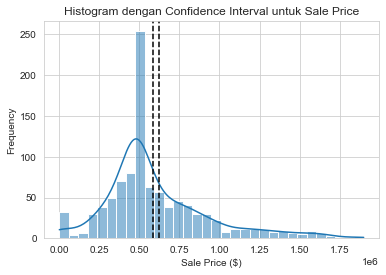

In [30]:
# ambil sample data dari dataset
sample_data = df.sample(n=1000, random_state=42)

# hitung mean dan standard deviation dari sample
mean = sample_data['SALE PRICE'].mean()
std_dev = sample_data['SALE PRICE'].std()

# hitung confidence interval
ci_low = mean - 1.96 * std_dev / np.sqrt(len(sample_data))
ci_high = mean + 1.96 * std_dev / np.sqrt(len(sample_data))

# buat histogram dengan garis vertikal menunjukkan confidence interval
sns.histplot(data=sample_data, x='SALE PRICE', kde=True)
plt.axvline(x=ci_low, color='black', linestyle='--')
plt.axvline(x=ci_high, color='black', linestyle='--')

# tambahkan label dan judul plot
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.title('Histogram dengan Confidence Interval untuk Sale Price')

plt.show()

<h1>Hypothesis Testing</h1>

Apakah harga properti di Manhattan secara signifikan lebih tinggi daripada harga properti di borough lain di New York City?

In [31]:
# filter data untuk Manhattan dan borough lainnya
manhattan = df[df['BOROUGH'] == 1]
other_boroughs = df[df['BOROUGH'].isin([2, 3, 4, 5])]

# melakukan two-sample t-test dengan mengasumsikan varian yang tidak sama
t, p = ttest_ind(manhattan['SALE PRICE'], other_boroughs['SALE PRICE'], equal_var=False)

# tentukan tingkat signifikansi
alpha = 0.05

# interpretasikan nilai p
if p < alpha:
    print('Tolak hipotesis: Harga properti di Manhattan secara signifikan lebih tinggi daripada harga properti di borough lainnya')
else:
    print('Terima hipotesis: Harga properti di Manhattan tidak secara signifikan lebih tinggi daripada harga properti di borough lainnya')

Terima hipotesis: Harga properti di Manhattan tidak secara signifikan lebih tinggi daripada harga properti di borough lainnya


# Overall Analysis

1. Kesimpulan dari Measure of Tendency Central and Measure of Spread yaitu :

In [32]:
df.describe(include='all')

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,25829,25829,25829,25829,25829.000000,25829.000000,25829,25829.000000,25829.0,25829.000000,25829.000000,25829.000000,25829,25829,25829,2.582900e+04,25829
unique,5,202,13,2,NaN,NaN,26,NaN,NaN,NaN,NaN,NaN,119,3,29,NaN,355
top,3,EAST NEW YORK,01 ONE FAMILY DWELLINGS,1,NaN,NaN,A1,NaN,NaN,NaN,NaN,NaN,1920,1,A1,NaN,2016-09-30 00:00:00
freq,9988,693,11613,25808,NaN,NaN,4229,NaN,NaN,NaN,NaN,NaN,3274,25805,4225,NaN,176
mean,NaN,NaN,NaN,NaN,5597.031670,45.917302,NaN,1.673816,0.0,1.673816,2641.567850,1906.926013,NaN,NaN,NaN,5.954965e+05,NaN
std,NaN,NaN,NaN,NaN,3303.355947,35.946799,NaN,0.688545,0.0,0.688545,970.670092,734.609672,NaN,NaN,NaN,3.160943e+05,NaN
min,NaN,NaN,NaN,NaN,15.000000,1.000000,NaN,0.000000,0.0,0.000000,200.000000,100.000000,NaN,NaN,NaN,1.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,3252.000000,20.000000,NaN,1.000000,0.0,1.000000,2000.000000,1337.000000,NaN,NaN,NaN,4.400000e+05,NaN
50%,NaN,NaN,NaN,NaN,5145.000000,38.000000,NaN,2.000000,0.0,2.000000,2417.000000,1768.000000,NaN,NaN,NaN,4.820000e+05,NaN
75%,NaN,NaN,NaN,NaN,7693.000000,61.000000,NaN,2.000000,0.0,2.000000,3115.000000,2324.000000,NaN,NaN,NaN,7.280000e+05,NaN


2. Propability Distribution digunakan untuk melihat distribusi dari kolom 'GROSS SQUARE FEET' berada di rentang 2400 ~ 2600
3. Confidence Intervals 'SALE PRICE' di New York City pada tahun 2016 dan 2017 berada di rentang sekitar 5.6 ~ 5.8 atau 560.000 ~ 580.000 US Dolar
4. Hipotesis testing yang muncul untuk pertanyaan *Apakah harga properti di Manhattan secara signifikan lebih tinggi daripada harga properti di borough lain di New York City?* menghasilkan hipotesis *Terima hipotesis: Harga properti di Manhattan tidak secara signifikan lebih tinggi daripada harga properti di borough lainnya*